## Modeling 

In [105]:
# basic packages
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt

In [106]:
df = pd.read_pickle('datasets_modeling/train_dummy.pickle')
test = pd.read_pickle('datasets_modeling/test_dummy.pickle')

In [107]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score, recall_score
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [108]:
# target, X
y = df['isFraud']
X = df.drop('isFraud',axis=1)

In [109]:
# feature selection with XGBoost

from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance

clf = XGBClassifier(n_estimators=100)
clf = clf.fit(X, y)



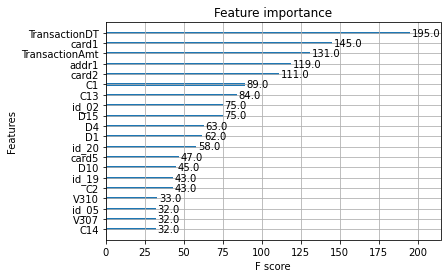

In [110]:
plot_importance(clf,max_num_features=20)
plt.show()

In [111]:
# # Select From Model
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape        

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(79958, 211)

In [112]:
# save selected features
import pickle 
pickle_out = open("datasets_modeling/X_new.pickle","wb")
pickle.dump(X_new, pickle_out)
pickle_out.close()

In [113]:
X_new = pd.read_pickle('datasets_modeling/X_new.pickle')
X_new.shape

(79958, 211)

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=1)

Synthetic minority over sampling technique — SMOTE - An approach to the construction of classifiers from imbalanced datasets is described

In [115]:
# light gbm grid search

import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from imblearn.over_sampling import SMOTE



y = df['isFraud']
X = pd.read_pickle('datasets_modeling/X_new.pickle')

smt = SMOTE(sampling_strategy='minority',random_state=1)
X_resampled, y_resampled = smt.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size=0.2,
                                                 random_state=1)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {'num_leaves':60,
        'min_child_samples': 30,
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'objective': 'binary',
        'max_depth': 13,
        'learning_rate': 0.03,
        "subsample_freq": 3,
        "subsample": 0.9,
        "bagging_seed": 11,
        "metric": 'auc',
        "verbosity": -1,
        'reg_alpha': 0.3,
        'reg_lambda': 0.3,
        'colsample_bytree': 0.9,
}

gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval)


model = lgb.LGBMClassifier( 
    boosting_type="gbdt",
    metrics='auc',
    is_unbalance=True, 
    random_state=10, 
    n_estimators=50,
    num_leaves=30, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)
scoring = {'AUC': 'roc_auc'}

# Create the grid

params_opt = {'n_estimators':range(200, 600, 80), 'num_leaves':range(20,60,10)}
gridSearchCV = GridSearchCV(estimator = model, 
    param_grid = params_opt, 
    scoring='roc_auc',
    n_jobs=4,
    #iid=False, 
    verbose=1,
    cv=3)

gridSearchCV.fit(X_train,y_train,)

[1]	valid_0's auc: 0.975427
[2]	valid_0's auc: 0.975917
[3]	valid_0's auc: 0.979638
[4]	valid_0's auc: 0.986244
[5]	valid_0's auc: 0.986381
[6]	valid_0's auc: 0.986583
[7]	valid_0's auc: 0.986387
[8]	valid_0's auc: 0.986753
[9]	valid_0's auc: 0.987053
[10]	valid_0's auc: 0.987058
[11]	valid_0's auc: 0.987013
[12]	valid_0's auc: 0.987063
[13]	valid_0's auc: 0.987069
[14]	valid_0's auc: 0.987352
[15]	valid_0's auc: 0.98751
[16]	valid_0's auc: 0.987525
[17]	valid_0's auc: 0.987542
[18]	valid_0's auc: 0.987484
[19]	valid_0's auc: 0.987728
[20]	valid_0's auc: 0.987816
[21]	valid_0's auc: 0.988597
[22]	valid_0's auc: 0.988634
[23]	valid_0's auc: 0.98882
[24]	valid_0's auc: 0.988857
[25]	valid_0's auc: 0.988858
[26]	valid_0's auc: 0.98886
[27]	valid_0's auc: 0.989938
[28]	valid_0's auc: 0.990116
[29]	valid_0's auc: 0.990301
[30]	valid_0's auc: 0.990422
[31]	valid_0's auc: 0.990422
[32]	valid_0's auc: 0.99065
[33]	valid_0's auc: 0.990737
[34]	valid_0's auc: 0.990942
[35]	valid_0's auc: 0.99103

GridSearchCV(cv=3,
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=15,
                                      feature_fraction=0.5, is_unbalance=True,
                                      learning_rate=0.01, max_depth=8,
                                      metrics='auc', n_estimators=50,
                                      num_leaves=30, random_state=10),
             n_jobs=4,
             param_grid={'n_estimators': range(200, 600, 80),
                         'num_leaves': range(20, 60, 10)},
             scoring='roc_auc', verbose=1)

In [116]:
print('Best parameters found by grid search are:', gridSearchCV.best_params_)
print('Best score found by grid search is:', gridSearchCV.best_score_)

y_hat = gridSearchCV.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print('Recall', recall_score(y_test,y_hat))
print('Precision',precision_score(y_test,y_hat))
print('AUC_ROC',roc_auc_score(y_test,y_hat))
print(classification_report(y_test, y_hat))
print(accuracy_score(y_test,y_hat))

Best parameters found by grid search are: {'n_estimators': 520, 'num_leaves': 50}
Best score found by grid search is: 0.9964206358603662
[[15318    68]
 [  380 15146]]
Recall 0.9755249259306968
Precision 0.995530432496385
AUC_ROC 0.985552661847449
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15386
           1       1.00      0.98      0.99     15526

    accuracy                           0.99     30912
   macro avg       0.99      0.99      0.99     30912
weighted avg       0.99      0.99      0.99     30912

0.9855072463768116


In [117]:
# light gbm grid search

import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from imblearn.over_sampling import SMOTE



y = df['isFraud']
X = pd.read_pickle('datasets_modeling/X_new.pickle')

smt = SMOTE(sampling_strategy='minority',random_state=1)
X_resampled, y_resampled = smt.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size=0.2,
                                                 random_state=1)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


model = lgb.LGBMClassifier( 
    boosting_type="gbdt",
    metrics='auc',
    is_unbalance=False, 
    random_state=10, 
    n_estimators=520,
    num_leaves=50, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)
scoring = {'AUC': 'roc_auc'}

model.fit(X_train,y_train)
y_hat = model.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print('Recall', recall_score(y_test,y_hat))
print('Precision',precision_score(y_test,y_hat))
print('AUC_ROC',roc_auc_score(y_test,y_hat))
print(classification_report(y_test, y_hat))
print(accuracy_score(y_test,y_hat))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[15316    70]
 [  383 15143]]
Recall 0.9753317016617287
Precision 0.9953986721882601
AUC_ROC 0.9853910555624386
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15386
           1       1.00      0.98      0.99     15526

    accuracy                           0.99     30912
   macro avg       0.99      0.99      0.99     30912
weighted avg       0.99      0.99      0.99     30912

0.98534549689441


In [118]:
# resampling with RandomOverSampler, SVM

from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC

ros = RandomOverSampler(random_state=0) #resampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

clf = LinearSVC() # fitting
clf.fit(X_resampled, y_resampled)
y_pred=clf.predict(X_test)

#scores
print(confusion_matrix(y_test, y_pred))
print('Recall', recall_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[15374    12]
 [15499    27]]
Recall 0.0017390184207136416
Precision 0.6923076923076923
AUC_ROC 0.500479544307198
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     15386
           1       0.69      0.00      0.00     15526

    accuracy                           0.50     30912
   macro avg       0.60      0.50      0.33     30912
weighted avg       0.60      0.50      0.33     30912

0.49822075569358176


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [119]:
# XGboost, SMOTE
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

clf = XGBClassifier(n_estimators=100)
smt = SMOTE(random_state=42)

pipeline = Pipeline([('smt', smt), ('xgboost', clf)])

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print('Recall', recall_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

[[15337    49]
 [  298 15228]]
Recall 0.9808063892824939
Precision 0.9967925639850757
AUC_ROC 0.9888108379533489
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15386
           1       1.00      0.98      0.99     15526

    accuracy                           0.99     30912
   macro avg       0.99      0.99      0.99     30912
weighted avg       0.99      0.99      0.99     30912

0.988774585921325
